In [1]:

list_of_packages <- c("ggplot2", "dplyr", "DESeq2","biomaRt","tidyr")
for(package in list_of_packages){
suppressPackageStartupMessages(suppressMessages(suppressWarnings(library(package,character.only=TRUE))))
}

In [2]:
figures_dir<-file.path("../figures")
if(!dir.exists(figures_dir)){
 dir.create(figures_dir, showWarnings = FALSE, recursive = TRUE)
}

In [3]:
dataset1 <- read.table("../data/GSE74886_raw_counts_GRCh38.p13_NCBI.tsv", header=TRUE, sep="\t")
dataset2 <- read.table("../data/GSE191270_raw_counts_GRCh38.p13_NCBI.tsv", header=TRUE, sep="\t")
head(dataset1)
head(dataset2)

,GeneID,GSM1937035,GSM1937037
,<int>,<int>,<int>
1,100287102,3,2
2,653635,103,138
3,102466751,8,4
4,107985730,1,4
5,100302278,0,0
6,645520,0,0


,GeneID,GSM5742788,GSM5742789,GSM5742790,GSM5742791,GSM5742792,GSM5742793,GSM5742794,GSM5742795,GSM5742796
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,100287102,2,4,1,2,4,4,1,3,2
2,653635,567,695,663,679,624,706,632,840,747
3,102466751,11,12,12,12,20,18,21,22,16
4,107985730,0,0,0,1,0,0,0,1,0
5,100302278,0,0,0,0,0,1,0,0,0
6,645520,0,0,0,0,0,0,0,0,0


In [4]:
# merge the two datasets
merged_dataset <- merge(dataset1, dataset2, by="GeneID", all=TRUE)
print(dim(merged_dataset))
head(merged_dataset)

[1] 39376    12


,GeneID,GSM1937035,GSM1937037,GSM5742788,GSM5742789,GSM5742790,GSM5742791,GSM5742792,GSM5742793,GSM5742794,GSM5742795,GSM5742796
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,101,206,254,259,255,274,230,270,170,221,206
2,2,46,65,0,2,0,1,0,0,0,2,2
3,3,0,8,2,2,0,0,0,0,0,1,2
4,9,33,62,20,11,13,25,14,19,31,30,26
5,10,1,4,0,1,0,0,0,0,0,0,0
6,12,0,4,0,3,1,0,0,0,0,0,0


In [5]:
# convert the GeneID to gene symbol
mart <- useMart(biomart="ENSEMBL_MART_ENSEMBL", dataset="hsapiens_gene_ensembl")
gene_id <- merged_dataset$GeneID
lookup <- getBM(
mart = mart,
attributes = c('entrezgene_id', 'ensembl_gene_id',
 'gene_biotype','hgnc_symbol','transcript_length'),
filter = 'entrezgene_id',
values = gene_id,
uniqueRows = TRUE)
# merge the two datasets
merged_dataset <- merge(merged_dataset, lookup, by.x="GeneID", by.y="entrezgene_id", all=TRUE)
# write the merged dataset to a file
head(merged_dataset)


,GeneID,GSM1937035,GSM1937037,GSM5742788,GSM5742789,GSM5742790,GSM5742791,GSM5742792,GSM5742793,GSM5742794,GSM5742795,GSM5742796,ensembl_gene_id,gene_biotype,hgnc_symbol,transcript_length
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,1,101,206,254,259,255,274,230,270,170,221,206,ENSG00000121410,protein_coding,A1BG,2134
2,1,101,206,254,259,255,274,230,270,170,221,206,ENSG00000121410,protein_coding,A1BG,3382
3,1,101,206,254,259,255,274,230,270,170,221,206,ENSG00000121410,protein_coding,A1BG,2301
4,1,101,206,254,259,255,274,230,270,170,221,206,ENSG00000121410,protein_coding,A1BG,475
5,1,101,206,254,259,255,274,230,270,170,221,206,ENSG00000121410,protein_coding,A1BG,917
6,2,46,65,0,2,0,1,0,0,0,2,2,ENSG00000175899,protein_coding,A2M,4610


In [6]:
# get some of the columns
dataset1 <- data.frame(merged_dataset$GeneID, merged_dataset$hgnc_symbol, merged_dataset$transcript_length, merged_dataset$GSM1937035, merged_dataset$GSM1937037)
dataset2 <- data.frame(merged_dataset$GeneID, merged_dataset$hgnc_symbol, merged_dataset$transcript_length, merged_dataset$GSM5742788, merged_dataset$GSM5742789, merged_dataset$GSM5742790, merged_dataset$GSM5742791, merged_dataset$GSM5742792, merged_dataset$GSM5742793, merged_dataset$GSM5742794, merged_dataset$GSM5742795, merged_dataset$GSM5742796)
# rename the columns to remove merged_dataset. prefix
colnames(dataset1) <- c("ensembl_gene_id",		"hgnc_symbol",	"transcript_length", "GSM1937035", "GSM1937037")
colnames(dataset2) <- c("ensembl_gene_id",		"hgnc_symbol",	"transcript_length", "GSM5742788", "GSM5742789", "GSM5742790", "GSM5742791", "GSM5742792", "GSM5742793", "GSM5742794", "GSM5742795", "GSM5742796")
head(dataset1)
head(dataset2)

,ensembl_gene_id,hgnc_symbol,transcript_length,GSM1937035,GSM1937037
,<int>,<chr>,<int>,<int>,<int>
1,1,A1BG,2134,101,206
2,1,A1BG,3382,101,206
3,1,A1BG,2301,101,206
4,1,A1BG,475,101,206
5,1,A1BG,917,101,206
6,2,A2M,4610,46,65


,ensembl_gene_id,hgnc_symbol,transcript_length,GSM5742788,GSM5742789,GSM5742790,GSM5742791,GSM5742792,GSM5742793,GSM5742794,GSM5742795,GSM5742796
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,A1BG,2134,254,259,255,274,230,270,170,221,206
2,1,A1BG,3382,254,259,255,274,230,270,170,221,206
3,1,A1BG,2301,254,259,255,274,230,270,170,221,206
4,1,A1BG,475,254,259,255,274,230,270,170,221,206
5,1,A1BG,917,254,259,255,274,230,270,170,221,206
6,2,A2M,4610,0,2,0,1,0,0,0,2,2


In [7]:
# normalize all genes via FPKM
# get the gene lengths

# get the counts
# define the fpkm for each column that begins with GSM
for (i in 1:ncol(dataset1)) {
if (grepl("GSM", colnames(dataset1)[i])) {
 dataset1[,colnames(dataset1)[i]] <- dataset1[,colnames(dataset1)[i]] / dataset1$transcript_length
}
}
for (i in 1:ncol(dataset2)) {
if (grepl("GSM", colnames(dataset2)[i])) {
 dataset2[,colnames(dataset2)[i]] <- dataset2[,colnames(dataset2)[i]] / dataset2$transcript_length
}
}

In [8]:
# plot the FPKM for GSDMD genes
genes <- c(
 "GSDMA",
 "GSDMB",
 "GSDMC",
 "GSDMD",
 "GSDME"
)
# get only genes of interest for dataset1
dataset1 <- dataset1[dataset1$hgnc_symbol %in% genes,]
# get only genes of interest for dataset2
dataset2 <- dataset2[dataset2$hgnc_symbol %in% genes,]
# drop esemble gene id, transcript length and gene lengths
dataset1$ensembl_gene_id <- NULL
dataset1$transcript_length <- NULL
dataset1$gene_lengths <- NULL
dataset2$ensembl_gene_id <- NULL
dataset2$transcript_length <- NULL
dataset2$gene_lengths <- NULL

# make each dataset tidy long format
dataset1 <- gather(dataset1, key="sample", value="fpkm", -hgnc_symbol)
dataset2 <- gather(dataset2, key="sample", value="fpkm", -hgnc_symbol)
# concat the two datasets
dataset <- rbind(dataset1, dataset2)

In [9]:
# get the mean and standard deviation for each gene for each sample
dataset <- dataset %>%
group_by(hgnc_symbol, sample) %>%
summarise(mean_fpkm = mean(fpkm), sd_fpkm = sd(fpkm))
head(dataset)

`summarise()` has grouped output by 'hgnc_symbol'. You can override using the `.groups` argument.


hgnc_symbol,sample,mean_fpkm,sd_fpkm
<chr>,<chr>,<dbl>,<dbl>
GSDMA,GSM1937035,0.000000000,0.000000000
GSDMA,GSM1937037,0.004905614,0.003694783
GSDMA,GSM5742788,0.000000000,0.000000000
GSDMA,GSM5742789,0.000000000,0.000000000
GSDMA,GSM5742790,0.000000000,0.000000000
GSDMA,GSM5742791,0.000000000,0.000000000


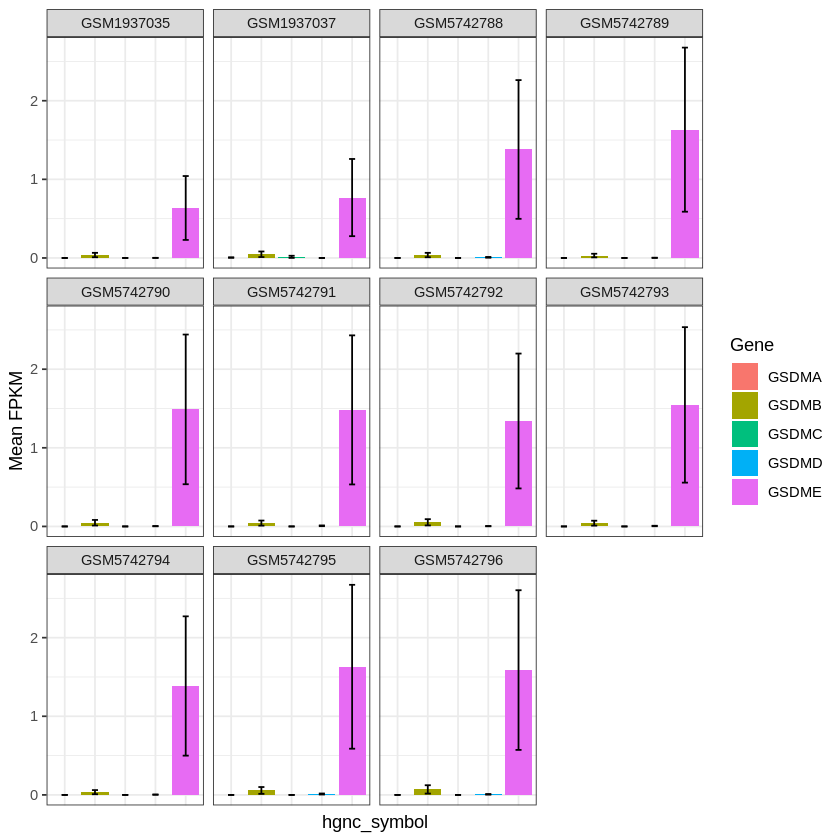

In [10]:
plot <- (
 ggplot(dataset, aes(x=hgnc_symbol, y=mean_fpkm, fill=hgnc_symbol)) 
 + geom_bar(stat="identity") 
 + theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
 + labs(y="Mean FPKM") 
 # remove the x-axis label
 + theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())
 + geom_errorbar(aes(ymin=mean_fpkm-sd_fpkm, ymax=mean_fpkm+sd_fpkm), width=.2, position=position_dodge(.9)) 
 # rename legend title
+ labs(fill="Gene")
 + theme_bw()
 + facet_wrap(~sample)
 # remove x axis ticks and labels
    + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())
    
)
ggsave(file.path(figures_dir, "GSDMD_gene_expression_SHSY5Y_dataset.png"), plot, width=12, height=8)
plot
